<h1>Sai Krishna
<h1>Ph22mscst11003

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
traindf = pd.read_csv("mnist_train.csv")
testdf = pd.read_csv("mnist_test.csv")

In [3]:

y_train = traindf["label"].copy().to_numpy()
X_train = traindf.drop(columns=["label"]).to_numpy()

y_test = testdf["label"].copy().to_numpy()
X_test = testdf.drop(columns=["label"]).to_numpy()

In [4]:
X_train,y_train

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([5, 0, 4, ..., 5, 6, 8]))

In [5]:


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

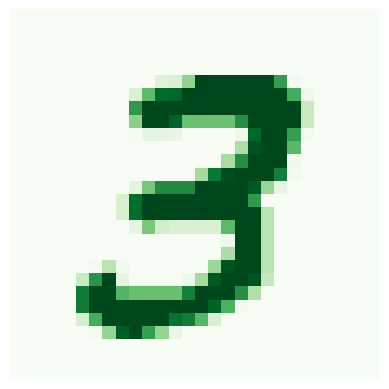

In [6]:

x_data = X_train[7]
x_image = x_data.reshape(28, 28)

plt.imshow(x_image, cmap=plt.cm.Greens)
plt.axis("off")
plt.show()

In [7]:
print(y_train[7])

3


In [8]:
# EXPLORING THE DATA A LITTLE MORE

def plot_digits(data, row_size=5):
    for i in range(len(data)):
        ax = plt.subplot(row_size, row_size, i+1)
        
        digit = data[i]
        digit_image = digit.reshape(28, 28)
        
        plt.imshow(digit_image, cmap=plt.cm.Greens)
        plt.axis("off")

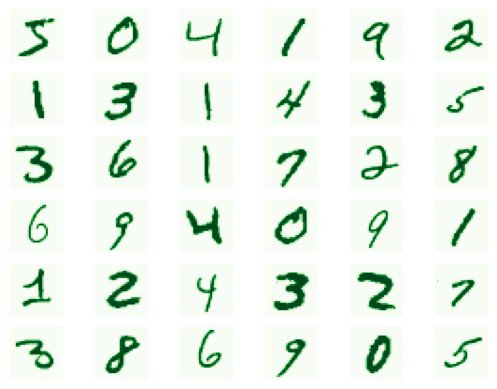

In [9]:
plot_digits(X_train[:36], row_size=6)
plt.show()

In [10]:


from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() # BY DEFAULT n_neighbors=5

In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
knn.predict([x_data])

array([3])

In [13]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [14]:
knn_preds = cross_val_predict(knn, X_train, y_train, cv=3)

In [15]:
knn_preds

array([5, 0, 4, ..., 5, 6, 8])

In [16]:
cf_mat = confusion_matrix(y_train, knn_preds)

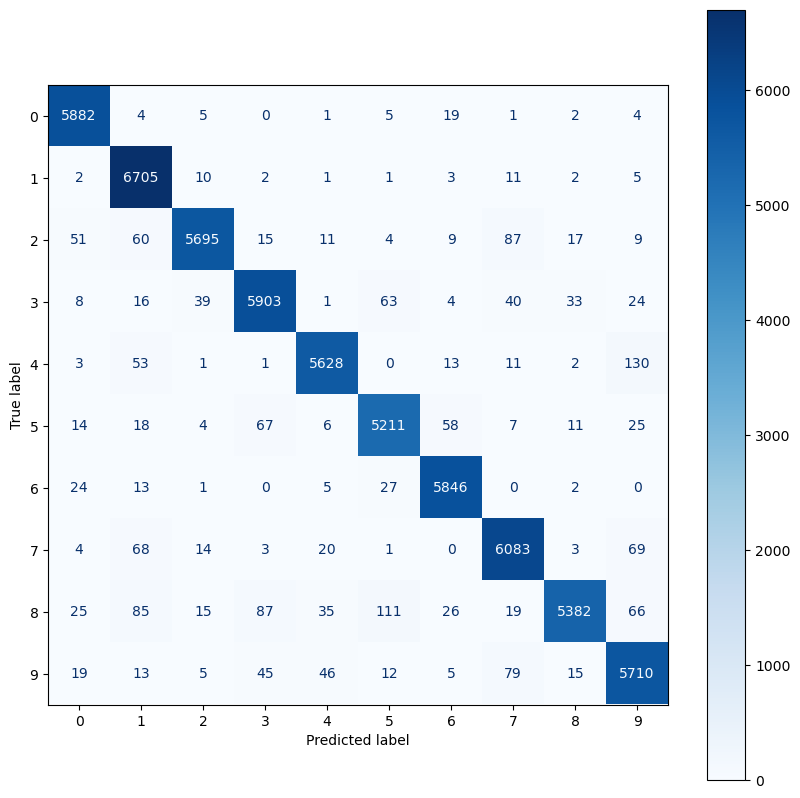

In [17]:
cm_fig, cm_ax = plt.subplots(figsize=(10, 10))
cf_mat_disp = ConfusionMatrixDisplay(cf_mat)
cf_mat_disp.plot(ax=cm_ax, cmap=plt.cm.Blues)
plt.show()

In [18]:
from sklearn.metrics import classification_report

def class_report(y, y_preds):
    print("\nClassification report:\n\n",
          classification_report(y, y_preds, digits=6))

In [19]:
class_report(y_train, knn_preds)


Classification report:

               precision    recall  f1-score   support

           0   0.975133  0.993078  0.984023      5923
           1   0.953092  0.994512  0.973361      6742
           2   0.983762  0.955858  0.969609      5958
           3   0.964070  0.962812  0.963441      6131
           4   0.978102  0.963369  0.970680      5842
           5   0.958786  0.961262  0.960022      5421
           6   0.977102  0.987834  0.982438      5918
           7   0.959766  0.970950  0.965326      6265
           8   0.984092  0.919843  0.950883      5851
           9   0.945051  0.959825  0.952381      5949

    accuracy                       0.967417     60000
   macro avg   0.967896  0.966934  0.967216     60000
weighted avg   0.967676  0.967417  0.967345     60000



HENCE BY TAKING THE DEFAULT VALUE OF n_neighbors = 5 we get the accuracy of 96% in our prediction.

In [20]:


knn_tuned = KNeighborsClassifier(n_neighbors=3, weights='distance')

In [21]:
knn_tuned.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [22]:
y_test_preds = knn_tuned.predict(X_test)

In [23]:
class_report(y_test, y_test_preds)


Classification report:

               precision    recall  f1-score   support

           0   0.973027  0.993878  0.983342       980
           1   0.965899  0.998238  0.981802      1135
           2   0.984205  0.966085  0.975061      1032
           3   0.966303  0.965347  0.965825      1010
           4   0.976313  0.965377  0.970814       982
           5   0.964126  0.964126  0.964126       892
           6   0.981289  0.985386  0.983333       958
           7   0.962246  0.966926  0.964580      1028
           8   0.987166  0.947639  0.966998       974
           9   0.958457  0.960357  0.959406      1009

    accuracy                       0.971700     10000
   macro avg   0.971903  0.971336  0.971529     10000
weighted avg   0.971811  0.971700  0.971663     10000



WHEN WE CHANGE THE hyperparameter n_neighbors = 3 , we get 97% accuracy.